In [15]:
import pandas as pd
import numpy as np
import sys

import datetime
from datetime import date, time
from datetime import datetime

# Matplotlib Library
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import plotly.express as px

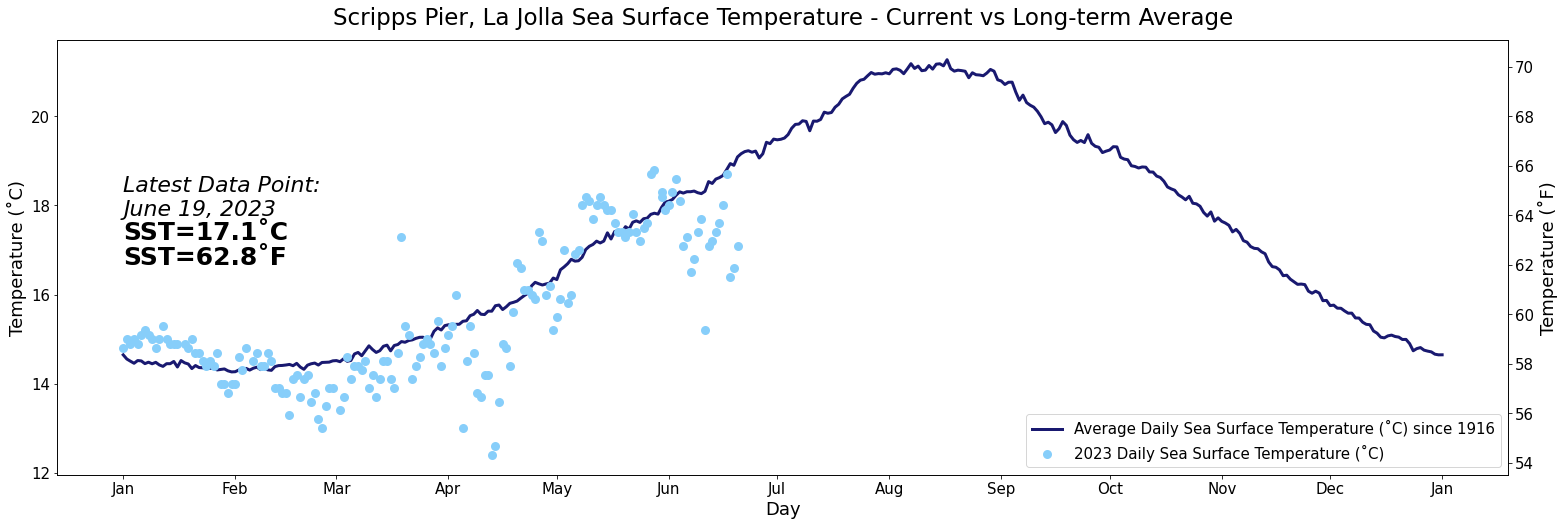

In [16]:
###  SIO  ###

#setting up working dataframe
SIO=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d SIO Shore Station Data.csv', sep=',')
SIO['DATETIME']=SIO['YEAR'].astype(str)+'-'+SIO['MONTH'].astype(str)+'-'+SIO['DAY'].astype(str)
SIO['DATETIME']=pd.to_datetime(SIO['DATETIME'])
SIO=SIO.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
SIO=SIO.assign(BOT_TEMP_F = lambda x: (9/5)*x['BOT_TEMP_C']+32).round(1)
SIO.drop(['Unnamed: 0','TIME_PST','TIME_FLAG'],axis=1, inplace=True)

#creating dataframe with long-term average temp
SIO_not_current=SIO.drop(SIO.index[38683:])
SIO_avg=SIO_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
SIO_avg['DATETIME']=SIO_avg['MONTH'].astype(str)+'-'+SIO_avg['DAY'].astype(str)

#creating dataframe with this year's temp
SIO_current=SIO.drop(SIO.index[:38683])
SIO_current['DATETIME']=SIO_current['MONTH'].astype(str)+'-'+SIO_current['DAY'].astype(str)

#finding current date & temp
date2=SIO['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

SIO_TEMP_C_SURF=SIO['SURF_TEMP_C'].iloc[-1]
SIO_TEMP_C_BOT=SIO['BOT_TEMP_C'].iloc[-1]
SIO_TEMP_F_SURF=SIO['SURF_TEMP_F'].iloc[-1]
SIO_TEMP_F_BOT=SIO['BOT_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SIO_avg['DATETIME'], SIO_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1916', zorder=10)

line2=ax.scatter(SIO_current['DATETIME'], SIO_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1916', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Scripps Pier, La Jolla Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(SIO_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(0, 62, "SST={}˚F".format(SIO_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

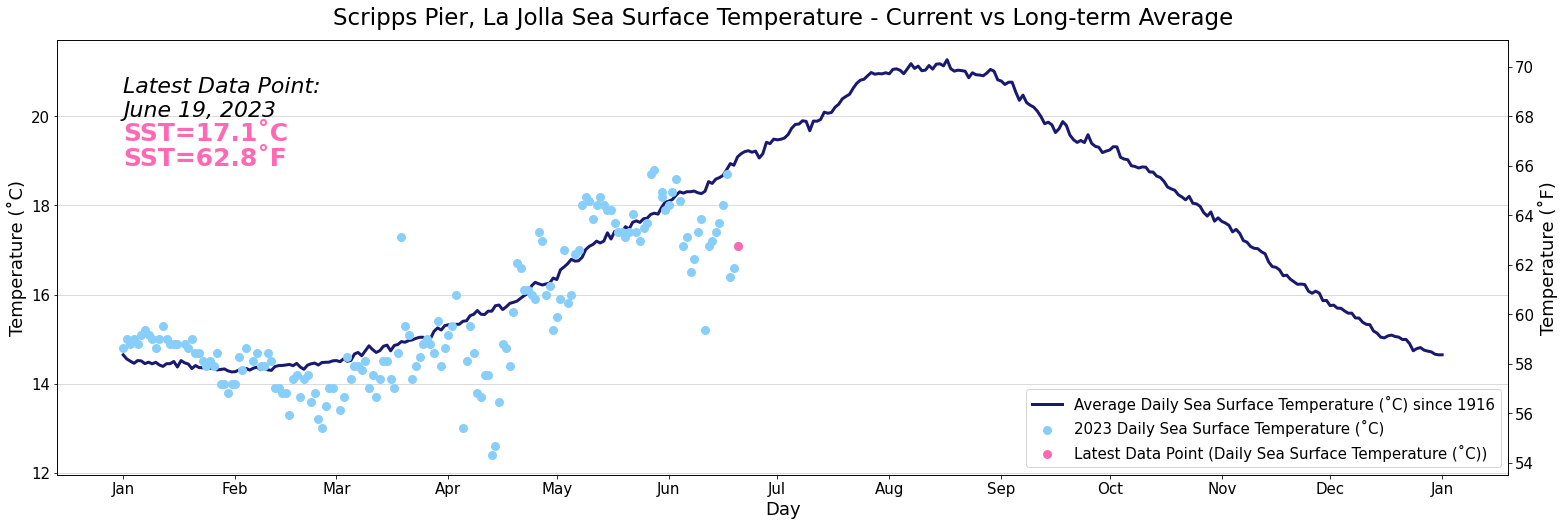

In [17]:
#final SIO Surface plot
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SIO_avg['DATETIME'], SIO_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1916', zorder=10)

line2=ax.scatter(SIO_current['DATETIME'], SIO_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1916', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=SIO_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=SIO_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1916', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Scripps Pier, La Jolla Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 68, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 67, "SST={}˚C".format(SIO_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 66, "SST={}˚F".format(SIO_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/SIO_surf_daily.png')

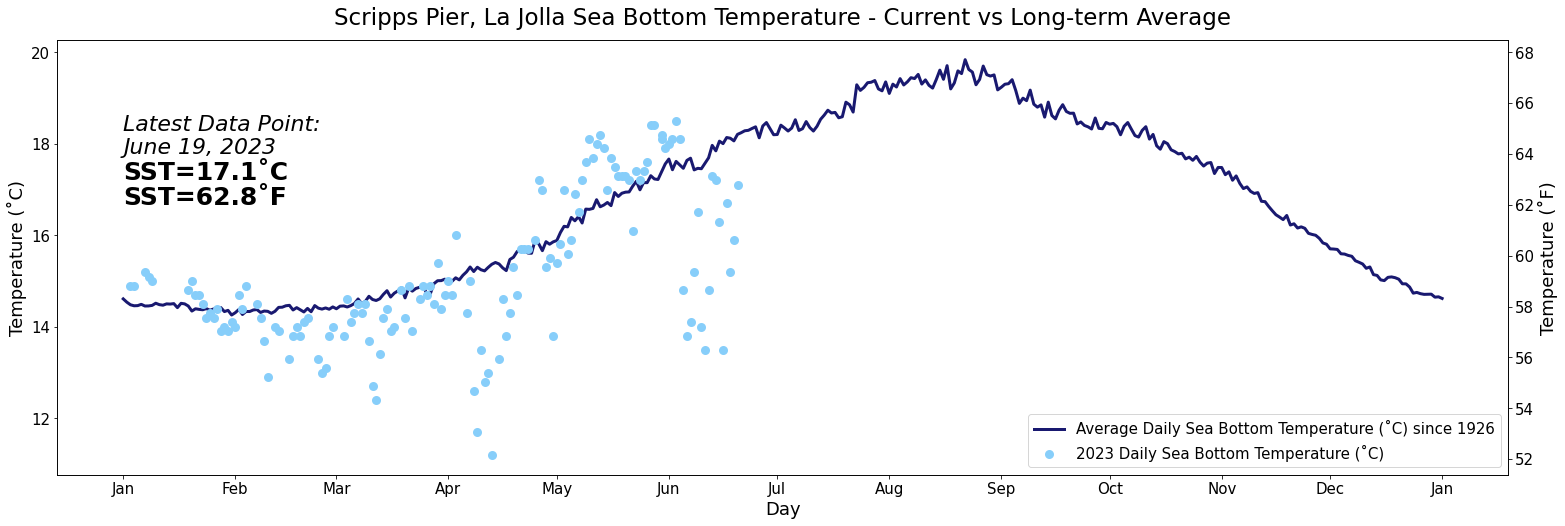

In [18]:
#first bottom plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SIO_avg['DATETIME'], SIO_avg['BOT_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Bottom Temperature (˚C) since 1926', zorder=10)

line2=ax.scatter(SIO_current['DATETIME'], SIO_current['BOT_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Bottom Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Bottom Temperature (˚C) since 1926', '2023 Daily Sea Bottom Temperature (˚C)'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Scripps Pier, La Jolla Sea Bottom Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(SIO_TEMP_C_BOT), fontsize = 25, fontweight='bold')
plt.text(0, 62, "SST={}˚F".format(SIO_TEMP_F_BOT), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

#plt.show()

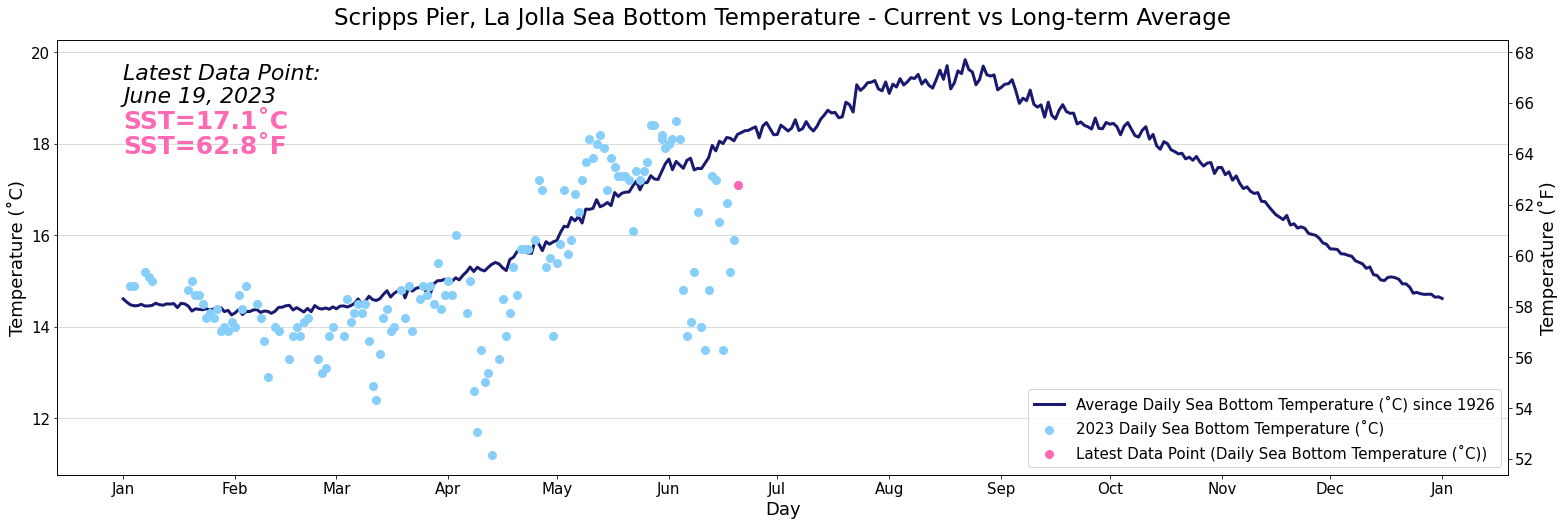

In [19]:
#final SIO Bottom plot
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SIO_avg['DATETIME'], SIO_avg['BOT_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Bottom Temperature (˚C) since 1926', zorder=10)

line2=ax.scatter(SIO_current['DATETIME'], SIO_current['BOT_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Bottom Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Bottom Temperature (˚C) since 1926', '2023 Daily Sea Bottom Temperature (˚C)'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=SIO_current['BOT_TEMP_C'].iloc[-1]
last_DATETIME=SIO_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Bottom Temperature (˚C) since 1926', '2023 Daily Sea Bottom Temperature (˚C)','Latest Data Point (Daily Sea Bottom Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Scripps Pier, La Jolla Sea Bottom Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 66, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 65, "SST={}˚C".format(SIO_TEMP_C_BOT), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 64, "SST={}˚F".format(SIO_TEMP_F_BOT), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/SIO_bot_daily.png')

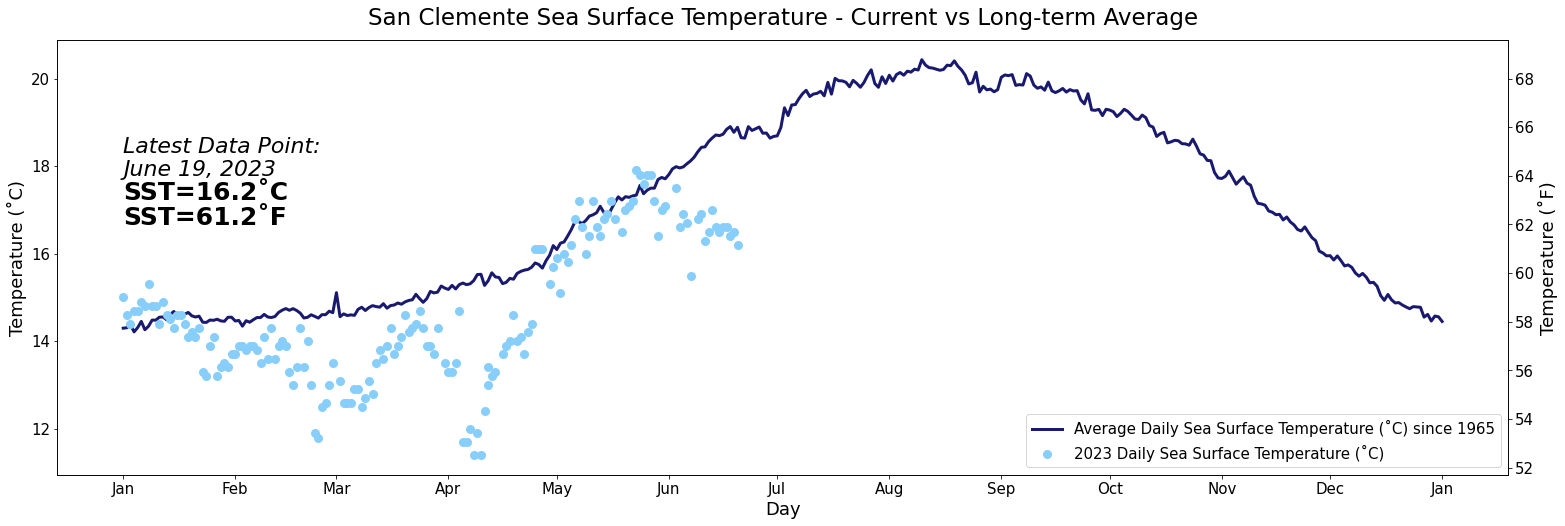

In [20]:
###  SC  ###

#setting up working dataframe
SC=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d San Clemente Shore Station Data.csv', sep=',')
SC['DATETIME']=SC['YEAR'].astype(str)+'-'+SC['MONTH'].astype(str)+'-'+SC['DAY'].astype(str)
SC['DATETIME']=pd.to_datetime(SC['DATETIME'])
SC=SC.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
SC.drop(['Unnamed: 0','TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
SC_not_current=SC.drop(SC.index[21002:])
SC_avg=SC_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
SC_avg['DATETIME']=SC_avg['MONTH'].astype(str)+'-'+SC_avg['DAY'].astype(str)

#creating dataframe with this year's temp
SC_current=SC.drop(SC.index[:21002])
SC_current['DATETIME']=SC_current['MONTH'].astype(str)+'-'+SC_current['DAY'].astype(str)

#finding current date & temp
date2=SC['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

SC_TEMP_C_SURF=SC['SURF_TEMP_C'].iloc[-1]
SC_TEMP_F_SURF=SC['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SC_avg['DATETIME'], SC_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1965', zorder=10)

line2=ax.scatter(SC_current['DATETIME'], SC_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1965', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('San Clemente Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(SC_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(0, 62, "SST={}˚F".format(SC_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

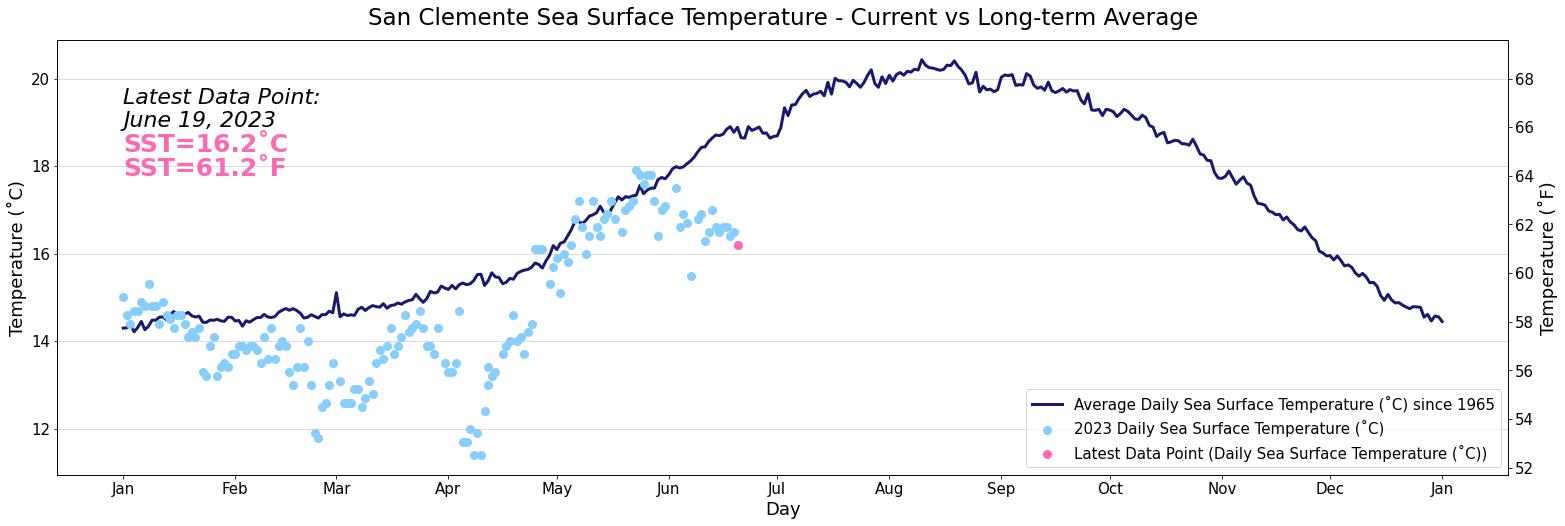

In [13]:
#final SC Surface plot
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SC_avg['DATETIME'], SC_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1965', zorder=10)

line2=ax.scatter(SC_current['DATETIME'], SC_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1965', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=SC_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=SC_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1965', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('San Clemente Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 66, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 65, "SST={}˚C".format(SC_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 64, "SST={}˚F".format(SC_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/SC_daily.png')

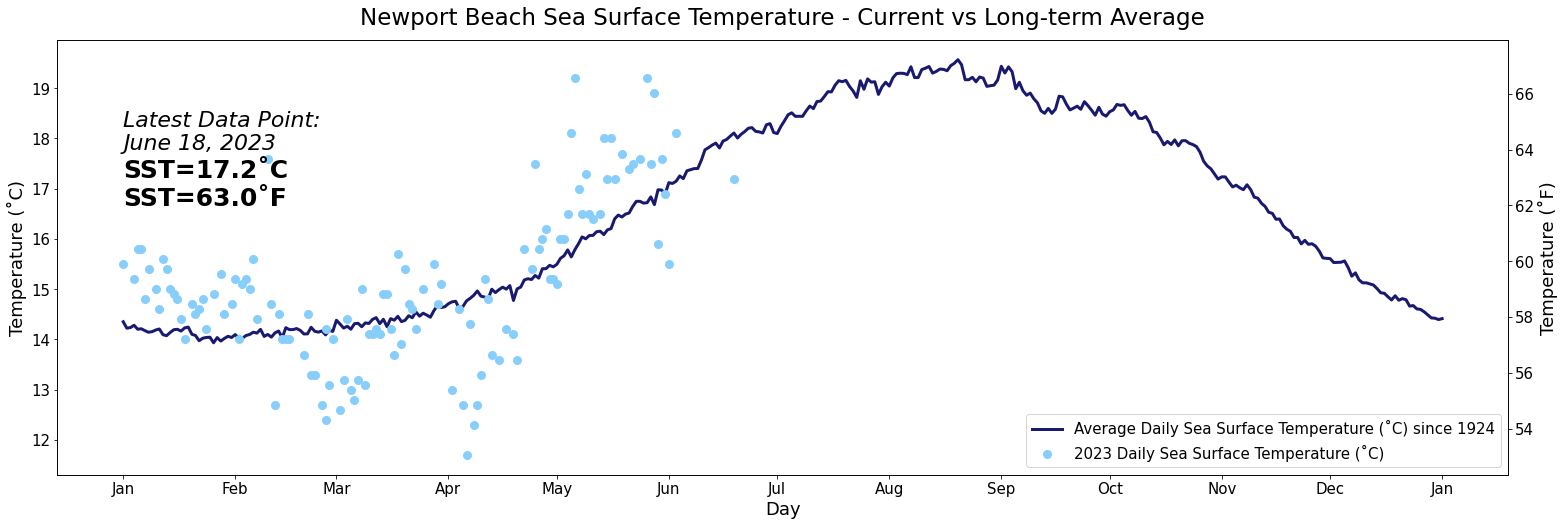

In [14]:
###  NB  ###

#setting up working dataframe
NB=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Newport Beach Shore Station Data.csv', sep=',')
NB['DATETIME']=NB['YEAR'].astype(str)+'-'+NB['MONTH'].astype(str)+'-'+NB['DAY'].astype(str)
NB['DATETIME']=pd.to_datetime(NB['DATETIME'])
NB=NB.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
NB.drop(['Unnamed: 0','TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
NB_not_current=NB.drop(NB.index[35855:])
NB_avg=NB_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
NB_avg['DATETIME']=NB_avg['MONTH'].astype(str)+'-'+NB_avg['DAY'].astype(str)

#creating dataframe with this year's temp
NB_current=NB.drop(NB.index[:35855])
NB_current['DATETIME']=NB_current['MONTH'].astype(str)+'-'+NB_current['DAY'].astype(str)

#finding current date & temp
date2=NB['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

NB_TEMP_C_SURF=NB['SURF_TEMP_C'].iloc[-1]
NB_TEMP_F_SURF=NB['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(NB_avg['DATETIME'], NB_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1924', zorder=10)

line2=ax.scatter(NB_current['DATETIME'], NB_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1924', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Newport Beach Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(NB_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(0, 62, "SST={}˚F".format(NB_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

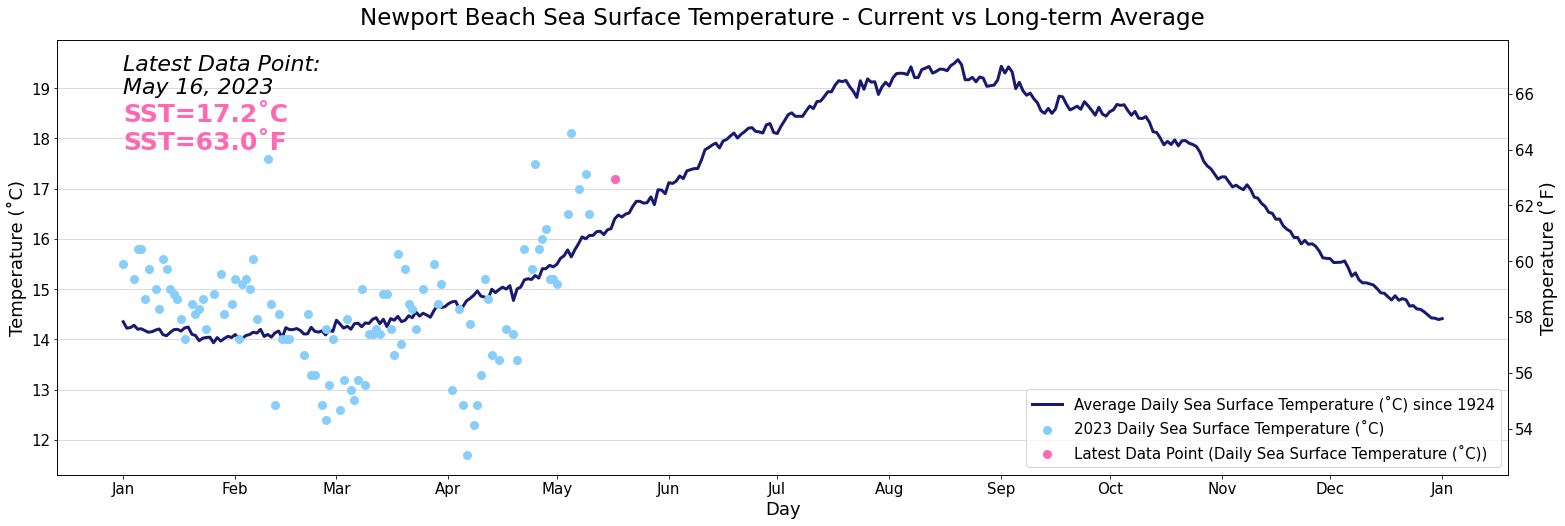

In [9]:
#final NB Surface plot
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(NB_avg['DATETIME'], NB_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1924', zorder=10)

line2=ax.scatter(NB_current['DATETIME'], NB_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1924', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=NB_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=NB_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1924', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Newport Beach Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 66, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 65, "SST={}˚C".format(NB_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 64, "SST={}˚F".format(NB_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/NB_daily.png')

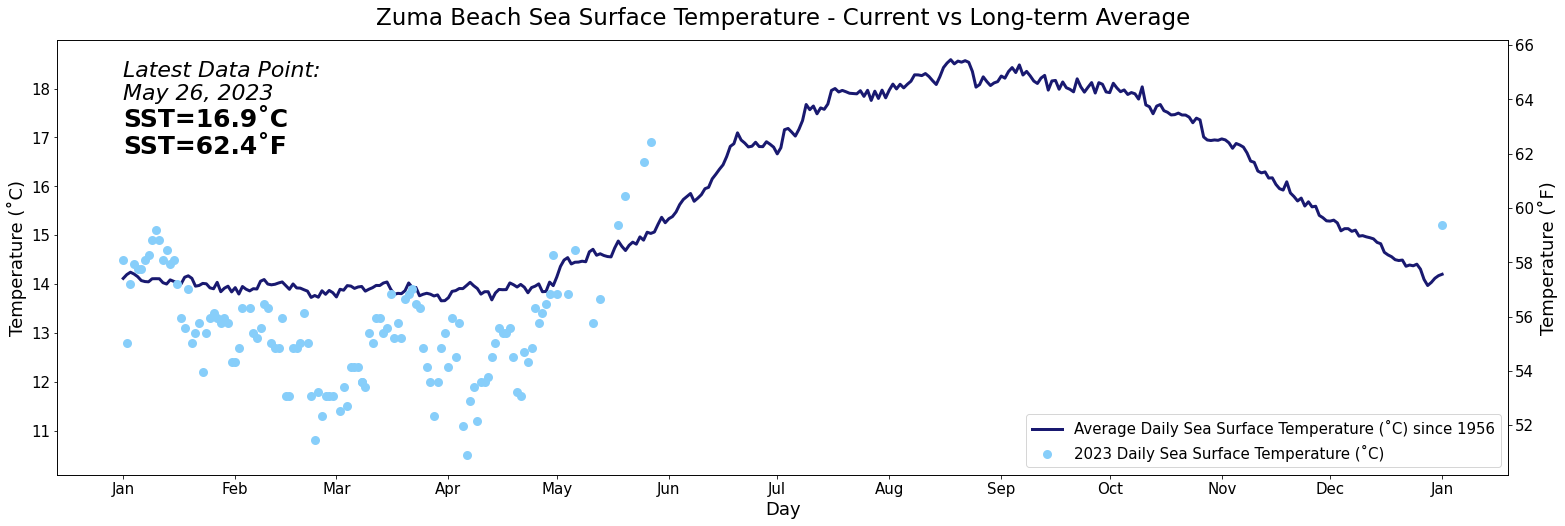

In [10]:
###  ZUMA  ###

#setting up working dataframe
ZUMA=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Zuma Beach Shore Station Data.csv', sep=',')
ZUMA['DATETIME']=ZUMA['YEAR'].astype(str)+'-'+ZUMA['MONTH'].astype(str)+'-'+ZUMA['DAY'].astype(str)
ZUMA['DATETIME']=pd.to_datetime(ZUMA['DATETIME'])
ZUMA=ZUMA.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
ZUMA.drop(['Unnamed: 0','TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
ZUMA_not_current=ZUMA.drop(ZUMA.index[24131:])
ZUMA_avg=ZUMA_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
ZUMA_avg['DATETIME']=ZUMA_avg['MONTH'].astype(str)+'-'+ZUMA_avg['DAY'].astype(str)

#creating dataframe with this year's temp
ZUMA_current=ZUMA.drop(ZUMA.index[:24131])
ZUMA_current['DATETIME']=ZUMA_current['MONTH'].astype(str)+'-'+ZUMA_current['DAY'].astype(str)

#finding current date & temp
date2=ZUMA['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

ZUMA_TEMP_C_SURF=ZUMA['SURF_TEMP_C'].iloc[-1]
ZUMA_TEMP_F_SURF=ZUMA['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(ZUMA_avg['DATETIME'], ZUMA_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1956', zorder=10)

line2=ax.scatter(ZUMA_current['DATETIME'], ZUMA_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1956', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Zuma Beach Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(ZUMA_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(0, 62, "SST={}˚F".format(ZUMA_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

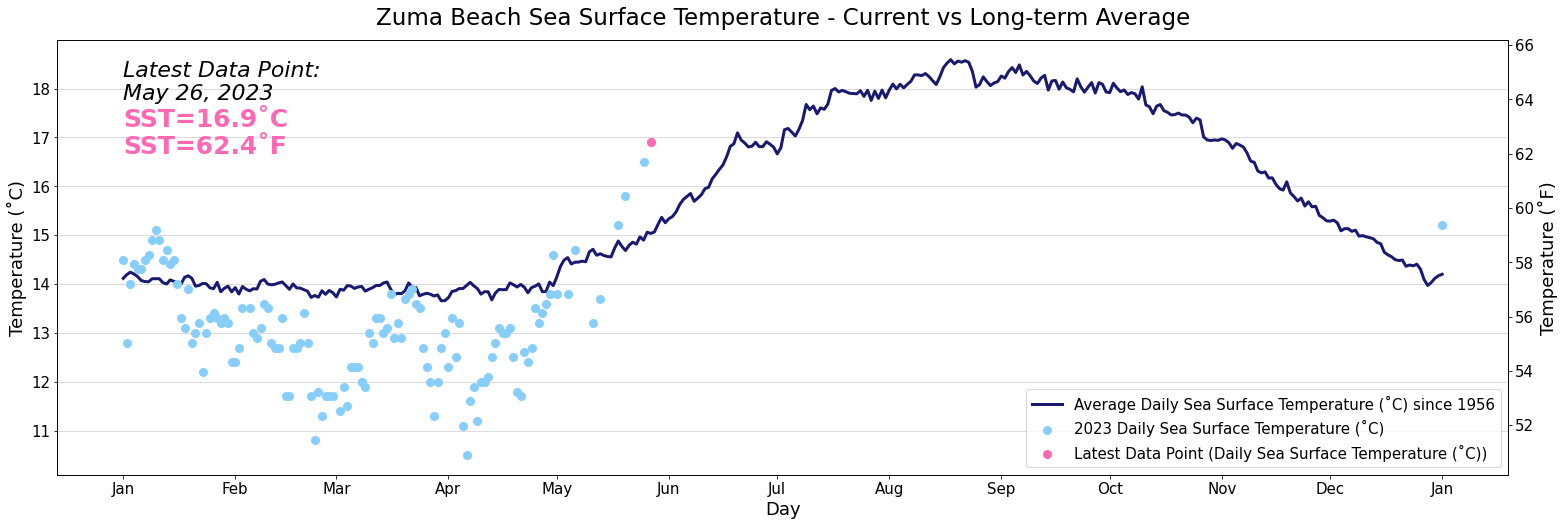

In [12]:
#final ZUMA Surface plot
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(ZUMA_avg['DATETIME'], ZUMA_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1956', zorder=10)

line2=ax.scatter(ZUMA_current['DATETIME'], ZUMA_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1956', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=ZUMA_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=ZUMA_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1956', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Zuma Beach Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(ZUMA_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 62, "SST={}˚F".format(ZUMA_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/ZUMA_daily.png')

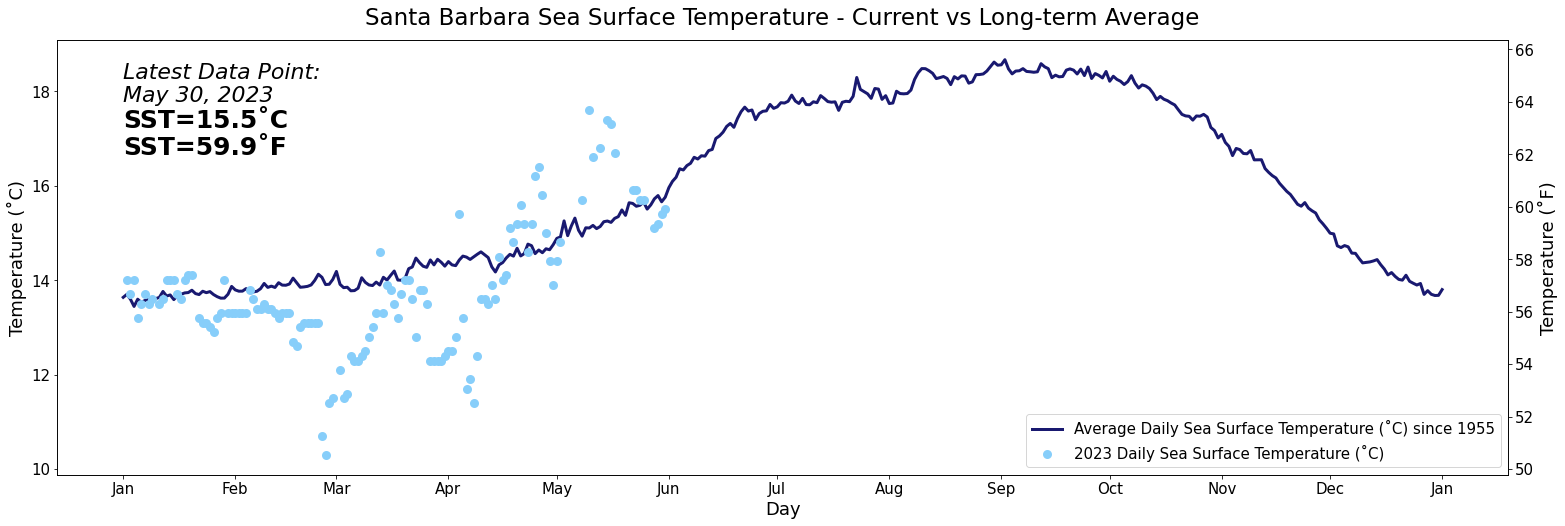

In [13]:
###  SB  ###

#setting up working dataframe
SB=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Santa Barbara Shore Station Data.csv', sep=',')
SB['DATETIME']=SB['YEAR'].astype(str)+'-'+SB['MONTH'].astype(str)+'-'+SB['DAY'].astype(str)
SB['DATETIME']=pd.to_datetime(SB['DATETIME'])
SB=SB.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
SB.drop(['Unnamed: 0','TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
SB_not_current=SB.drop(SB.index[24836:])
SB_avg=SB_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
SB_avg['DATETIME']=SB_avg['MONTH'].astype(str)+'-'+SB_avg['DAY'].astype(str)

#creating dataframe with this year's temp
SB_current=SB.drop(SB.index[:24836])
SB_current['DATETIME']=SB_current['MONTH'].astype(str)+'-'+SB_current['DAY'].astype(str)

#finding current date & temp
date2=SB['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

SB_TEMP_C_SURF=SB['SURF_TEMP_C'].iloc[-1]
SB_TEMP_F_SURF=SB['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SB_avg['DATETIME'], SB_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1955', zorder=10)

line2=ax.scatter(SB_current['DATETIME'], SB_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1955', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Santa Barbara Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(SB_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(0, 62, "SST={}˚F".format(SB_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

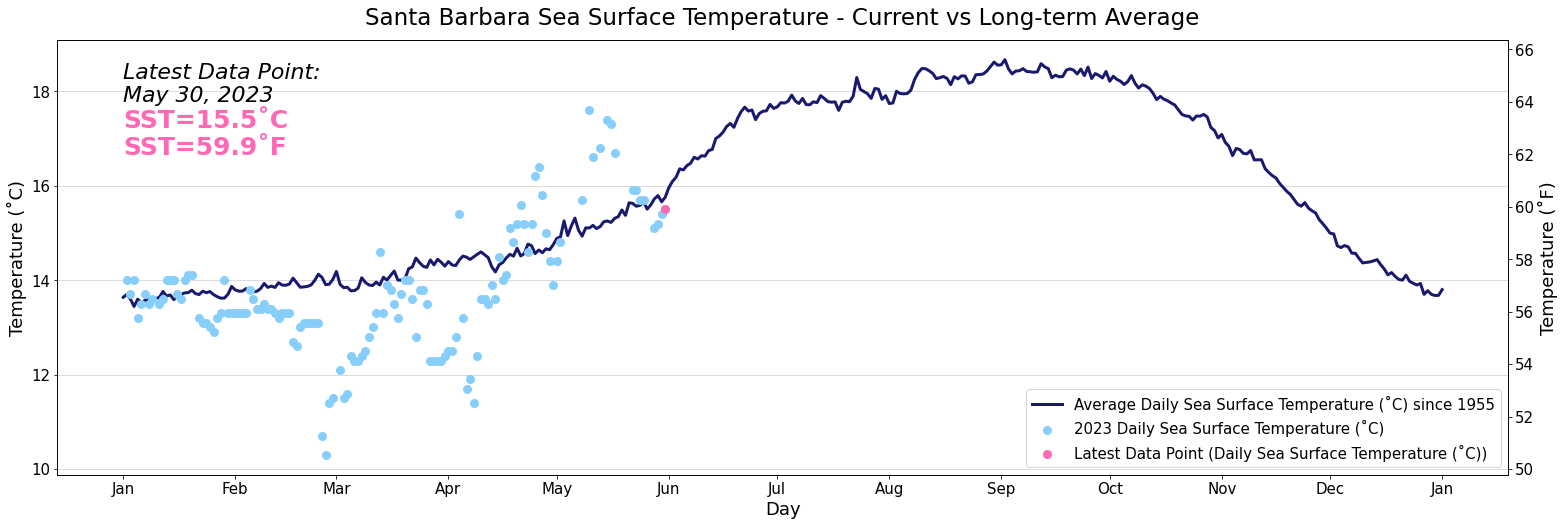

In [14]:
#final SB Surface plot

plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(SB_avg['DATETIME'], SB_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1955', zorder=10)

line2=ax.scatter(SB_current['DATETIME'], SB_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
#ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1955', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=SB_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=SB_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1955', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Santa Barbara Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 64, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 63, "SST={}˚C".format(SB_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 62, "SST={}˚F".format(SB_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/SB_daily.png')

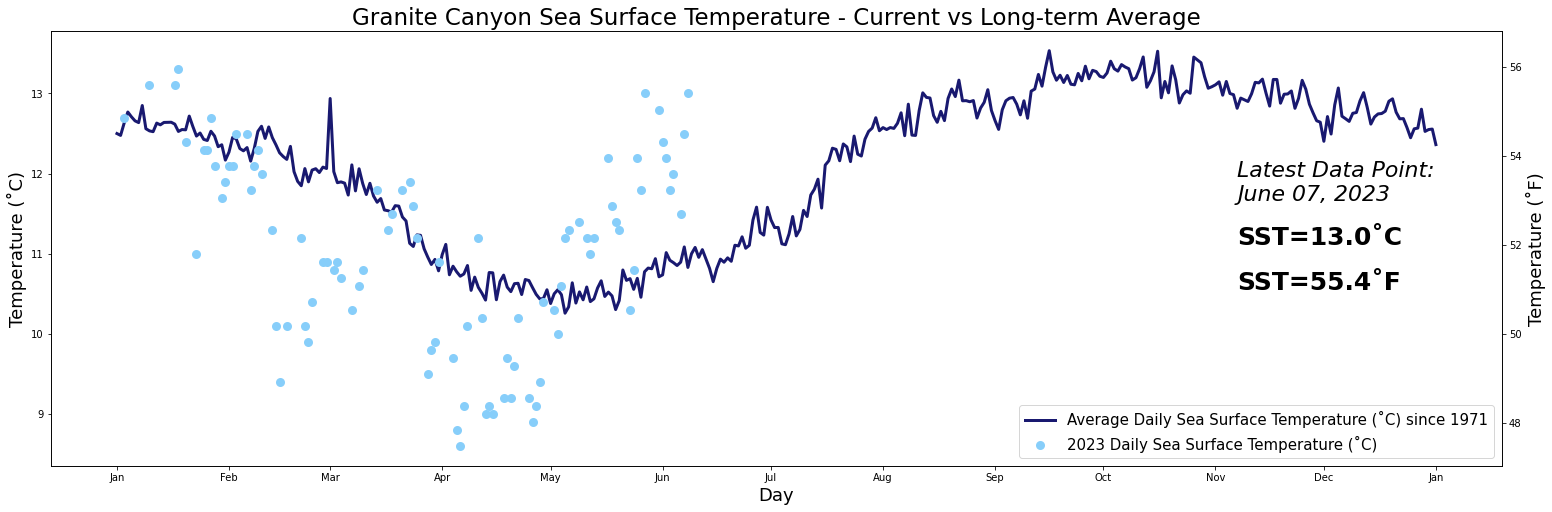

In [2]:
###  GC  ###

#setting up working dataframe
GC=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Granite Canyon Shore Station Data.csv', sep=',')
GC['DATETIME']=GC['YEAR'].astype(str)+'-'+GC['MONTH'].astype(str)+'-'+GC['DAY'].astype(str)
GC['DATETIME']=pd.to_datetime(GC['DATETIME'])
GC=GC.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
GC.drop(['Unnamed: 0','TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
GC_not_current=GC.drop(GC.index[18900:])
GC_avg=GC_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
GC_avg['DATETIME']=GC_avg['MONTH'].astype(str)+'-'+GC_avg['DAY'].astype(str)

#creating dataframe with this year's temp
GC_current=GC.drop(GC.index[:18900])
GC_current['DATETIME']=GC_current['MONTH'].astype(str)+'-'+GC_current['DAY'].astype(str)

#finding current date & temp
date2=GC['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

GC_TEMP_C_SURF=GC['SURF_TEMP_C'].iloc[-1]
GC_TEMP_F_SURF=GC['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(GC_avg['DATETIME'], GC_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1971', zorder=10)

line2=ax.scatter(GC_current['DATETIME'], GC_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1971', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Granite Canyon Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(310, 53, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(310, 52, "SST={}˚C".format(GC_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(310, 51, "SST={}˚F".format(GC_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

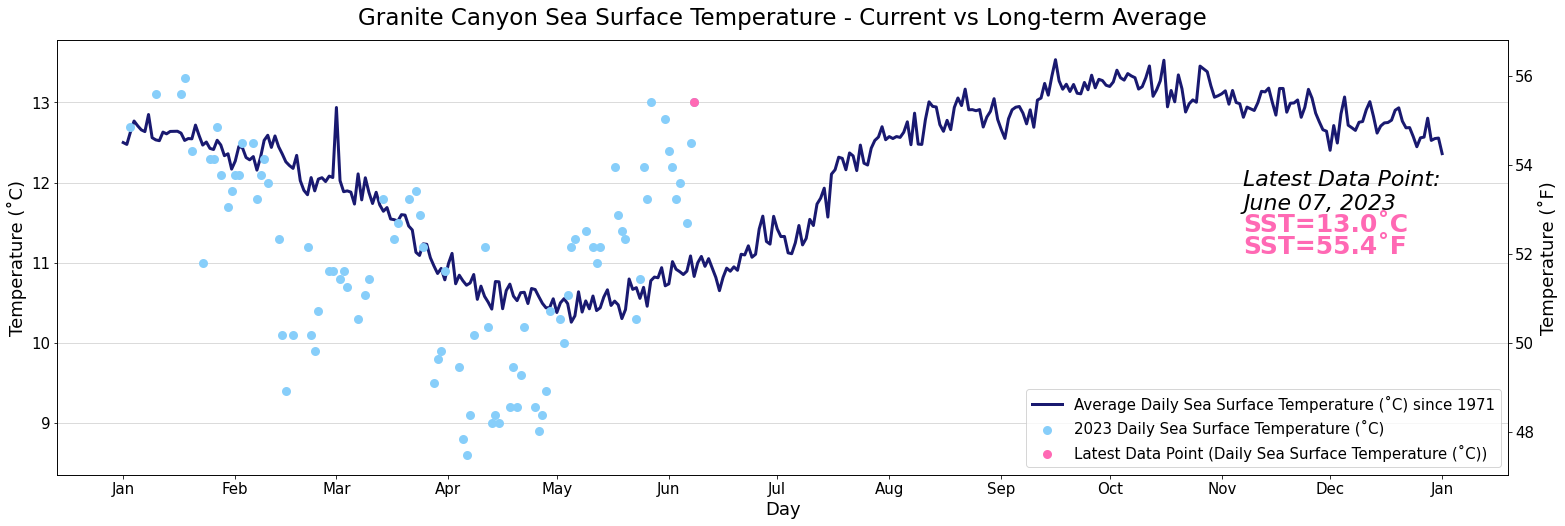

In [3]:
#final GC Surface plot

plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(GC_avg['DATETIME'], GC_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1971', zorder=10)

line2=ax.scatter(GC_current['DATETIME'], GC_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
#ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1971', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=GC_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=GC_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1971', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Granite Canyon Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(310, 53, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(310, 52.5, "SST={}˚C".format(GC_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(310, 52, "SST={}˚F".format(GC_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/GC_daily.png')

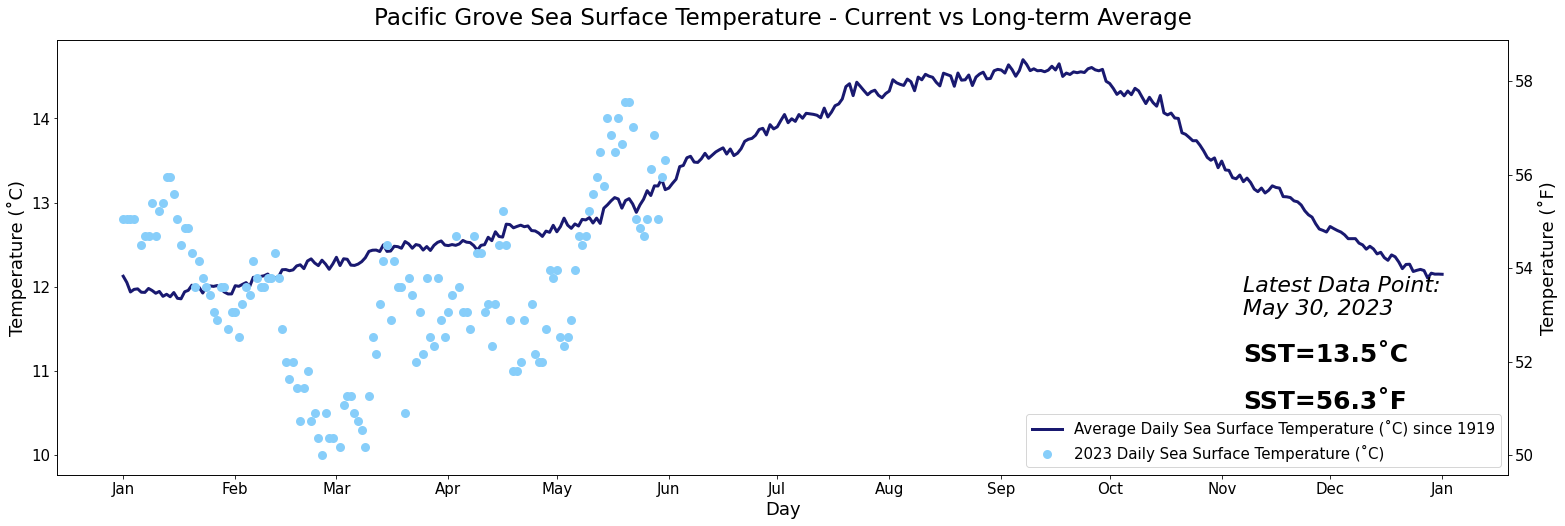

In [17]:
###  PG  ###

#setting up working dataframe
PG=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Pacific Grove Shore Station Data.csv', sep=',')
PG['DATETIME']=PG['YEAR'].astype(str)+'-'+PG['MONTH'].astype(str)+'-'+PG['DAY'].astype(str)
PG['DATETIME']=pd.to_datetime(PG['DATETIME'])
PG=PG.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
PG.drop(['Unnamed: 0','TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
PG_not_current=PG.drop(PG.index[37967:])
PG_avg=PG_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
PG_avg['DATETIME']=PG_avg['MONTH'].astype(str)+'-'+PG_avg['DAY'].astype(str)

#creating dataframe with this year's temp
PG_current=PG.drop(PG.index[:37967])
PG_current['DATETIME']=PG_current['MONTH'].astype(str)+'-'+PG_current['DAY'].astype(str)

#finding current date & temp
date2=PG['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

PG_TEMP_C_SURF=PG['SURF_TEMP_C'].iloc[-1]
PG_TEMP_F_SURF=PG['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(PG_avg['DATETIME'], PG_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1919', zorder=10)

line2=ax.scatter(PG_current['DATETIME'], PG_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1919', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Pacific Grove Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(310, 53, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(310, 52, "SST={}˚C".format(PG_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(310, 51, "SST={}˚F".format(PG_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

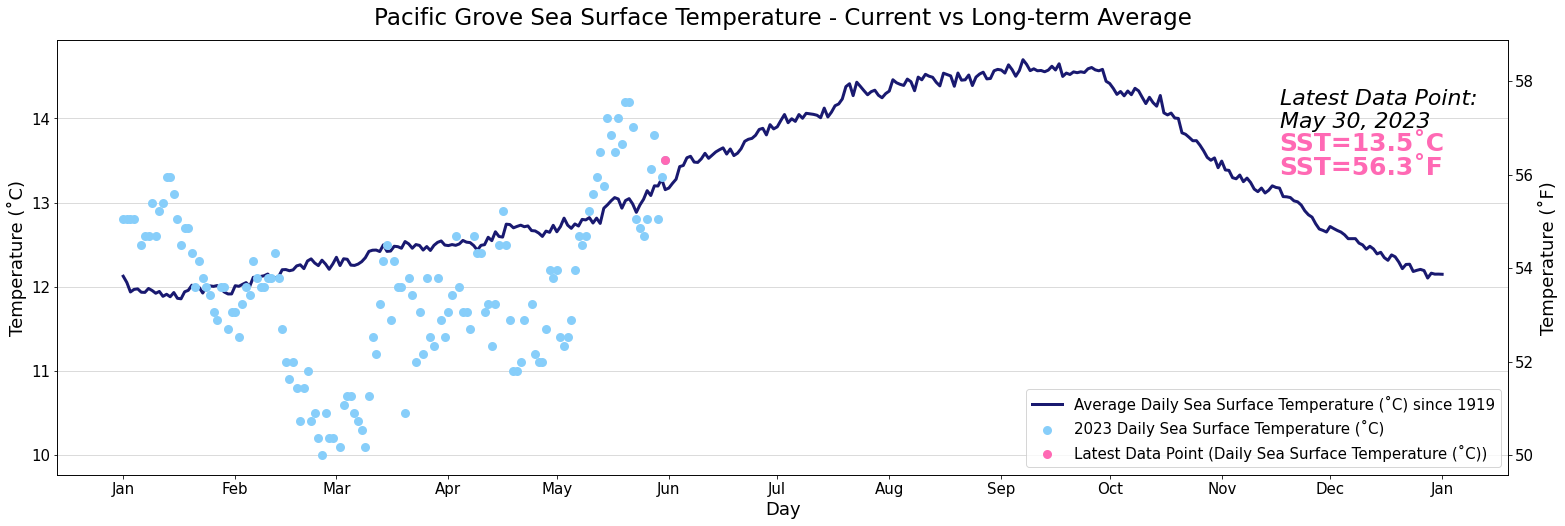

In [18]:
#final PG Surface plot

plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(PG_avg['DATETIME'], PG_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1919', zorder=10)

line2=ax.scatter(PG_current['DATETIME'], PG_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
#ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1919', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=PG_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=PG_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1919', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Pacific Grove Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(320, 57, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(320, 56.5, "SST={}˚C".format(PG_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(320, 56, "SST={}˚F".format(PG_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/PG_daily.png')

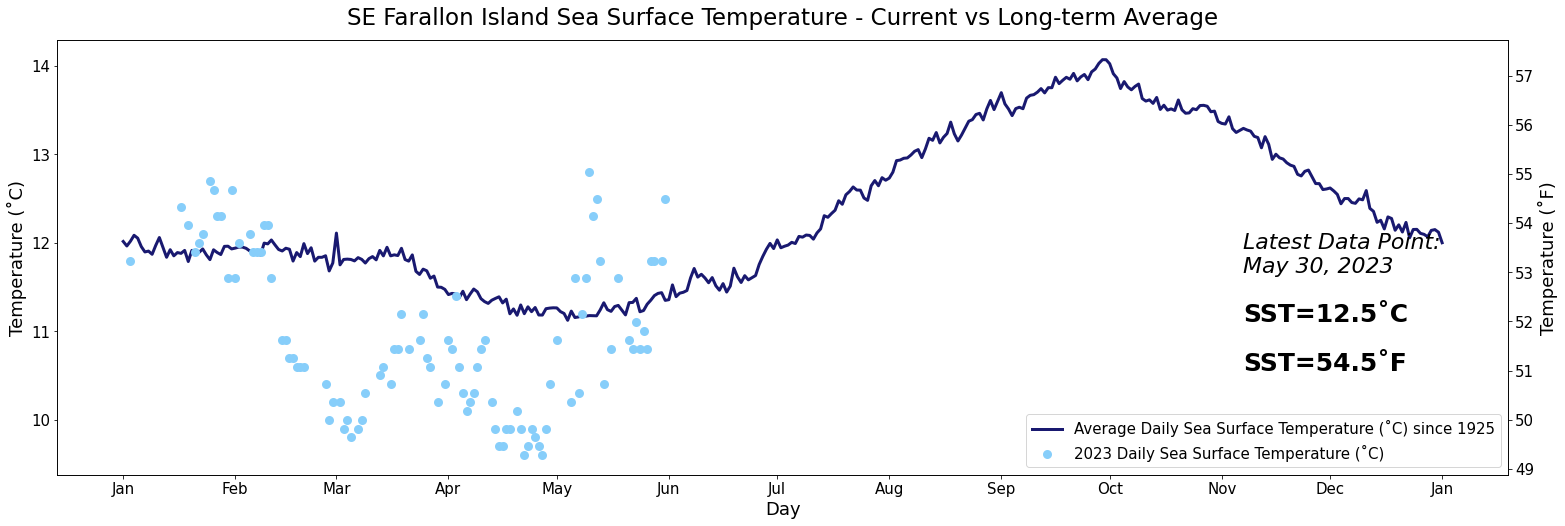

In [19]:
###  FAR  ###

#setting up working dataframe
FAR=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Farallon Shore Staion Data.csv', sep=',')
FAR['DATETIME']=FAR['YEAR'].astype(str)+'-'+FAR['MONTH'].astype(str)+'-'+FAR['DAY'].astype(str)
FAR['DATETIME']=pd.to_datetime(FAR['DATETIME'])
FAR=FAR.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
FAR.drop(['Unnamed: 0','TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
FAR_not_current=FAR.drop(FAR.index[35559:])
FAR_avg=FAR_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
FAR_avg['DATETIME']=FAR_avg['MONTH'].astype(str)+'-'+FAR_avg['DAY'].astype(str)

#creating dataframe with this year's temp
FAR_current=FAR.drop(FAR.index[:35559])
FAR_current['DATETIME']=FAR_current['MONTH'].astype(str)+'-'+FAR_current['DAY'].astype(str)

#finding current date & temp
date2=FAR['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

FAR_TEMP_C_SURF=FAR['SURF_TEMP_C'].iloc[-1]
FAR_TEMP_F_SURF=FAR['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(FAR_avg['DATETIME'], FAR_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1925', zorder=10)

line2=ax.scatter(FAR_current['DATETIME'], FAR_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1925', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('SE Farallon Island Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(310, 53, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(310, 52, "SST={}˚C".format(FAR_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(310, 51, "SST={}˚F".format(FAR_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

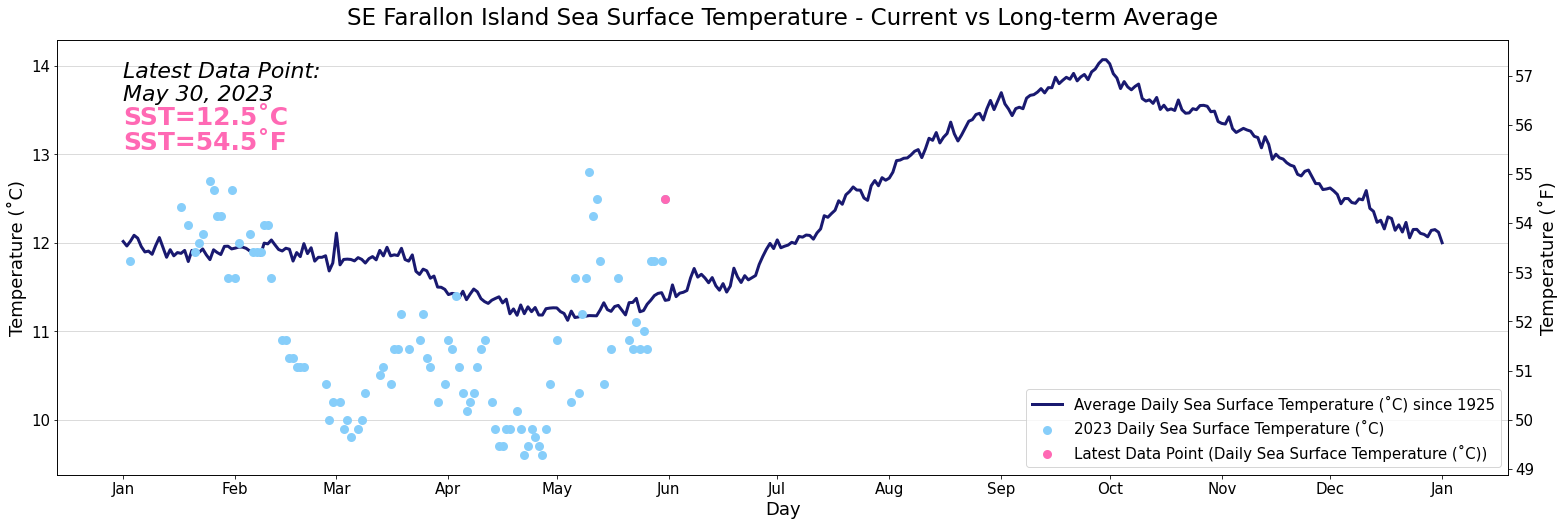

In [20]:
#final FAR Surface plot

plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(FAR_avg['DATETIME'], FAR_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1925', zorder=10)

line2=ax.scatter(FAR_current['DATETIME'], FAR_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
#ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1925', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=FAR_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=FAR_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1925', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('SE Farallon Island Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 56.5, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 56, "SST={}˚C".format(FAR_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 55.5, "SST={}˚F".format(FAR_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/FAR_daily.png')

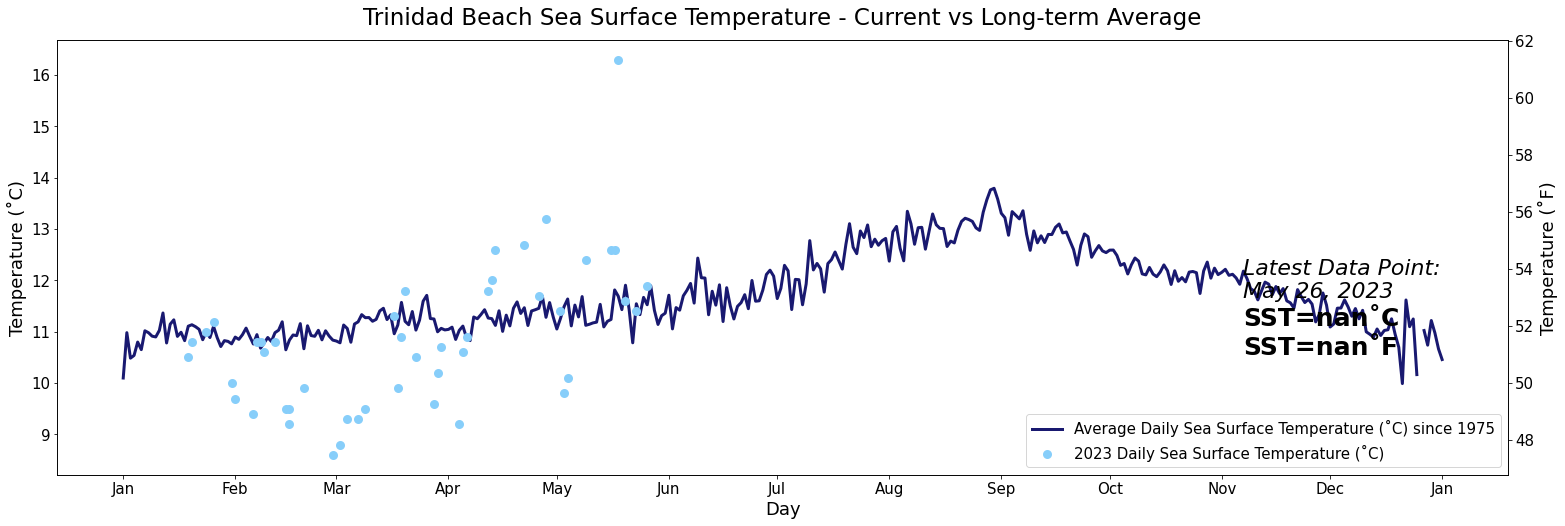

In [21]:
###  TBEACH  ###

#setting up working dataframe
TBEACH=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Trinidad Beach Shore Station Data.csv', sep=',')
TBEACH['DATETIME']=TBEACH['YEAR'].astype(str)+'-'+TBEACH['MONTH'].astype(str)+'-'+TBEACH['DAY'].astype(str)
TBEACH['DATETIME']=pd.to_datetime(TBEACH['DATETIME'])
TBEACH=TBEACH.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
TBEACH.drop(['TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
TBEACH_not_current=TBEACH.drop(TBEACH.index[17480:])
TBEACH_avg=TBEACH_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
TBEACH_avg['DATETIME']=TBEACH_avg['MONTH'].astype(str)+'-'+TBEACH_avg['DAY'].astype(str)

#creating dataframe with this year's temp
TBEACH_current=TBEACH.drop(TBEACH.index[:17480])
TBEACH_current['DATETIME']=TBEACH_current['MONTH'].astype(str)+'-'+TBEACH_current['DAY'].astype(str)

#finding current date & temp
date2=TBEACH['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

TBEACH_TEMP_C_SURF=TBEACH['SURF_TEMP_C'].iloc[-1]
TBEACH_TEMP_F_SURF=TBEACH['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(TBEACH_avg['DATETIME'], TBEACH_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1975', zorder=10)

line2=ax.scatter(TBEACH_current['DATETIME'], TBEACH_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1975', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Trinidad Beach Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(310, 53, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(310, 52, "SST={}˚C".format(TBEACH_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(310, 51, "SST={}˚F".format(TBEACH_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

/var/folders/69/cbrnkm0j709dqnkmhv8wnwgw0000gp/T/ipykernel_74798/4255386988.py:67: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/TBEACH_daily.png')
/var/folders/69/cbrnkm0j709dqnkmhv8wnwgw0000gp/T/ipykernel_74798/4255386988.py:67: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/TBEACH_daily.png')


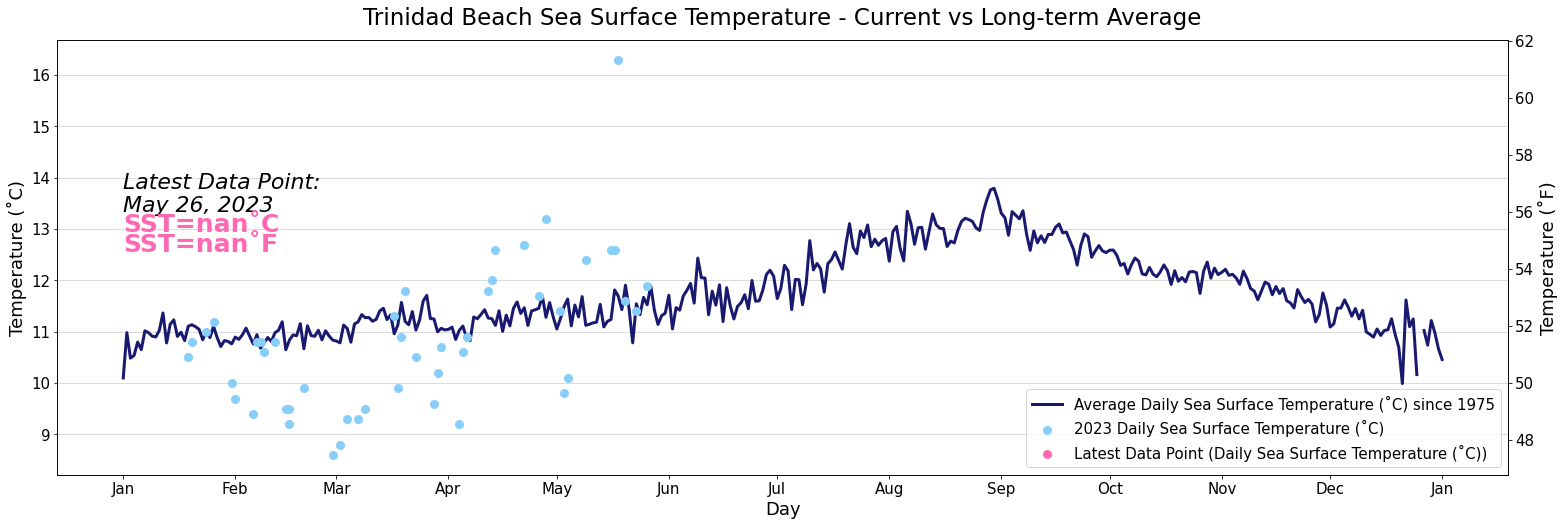

In [22]:
#final TBEACH Surface plot

plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(TBEACH_avg['DATETIME'], TBEACH_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1975', zorder=10)

line2=ax.scatter(TBEACH_current['DATETIME'], TBEACH_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
#ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1975', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=TBEACH_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=TBEACH_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1975', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Trinidad Beach Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 56, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 55.3, "SST={}˚C".format(TBEACH_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 54.6, "SST={}˚F".format(TBEACH_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/TBEACH_daily.png')

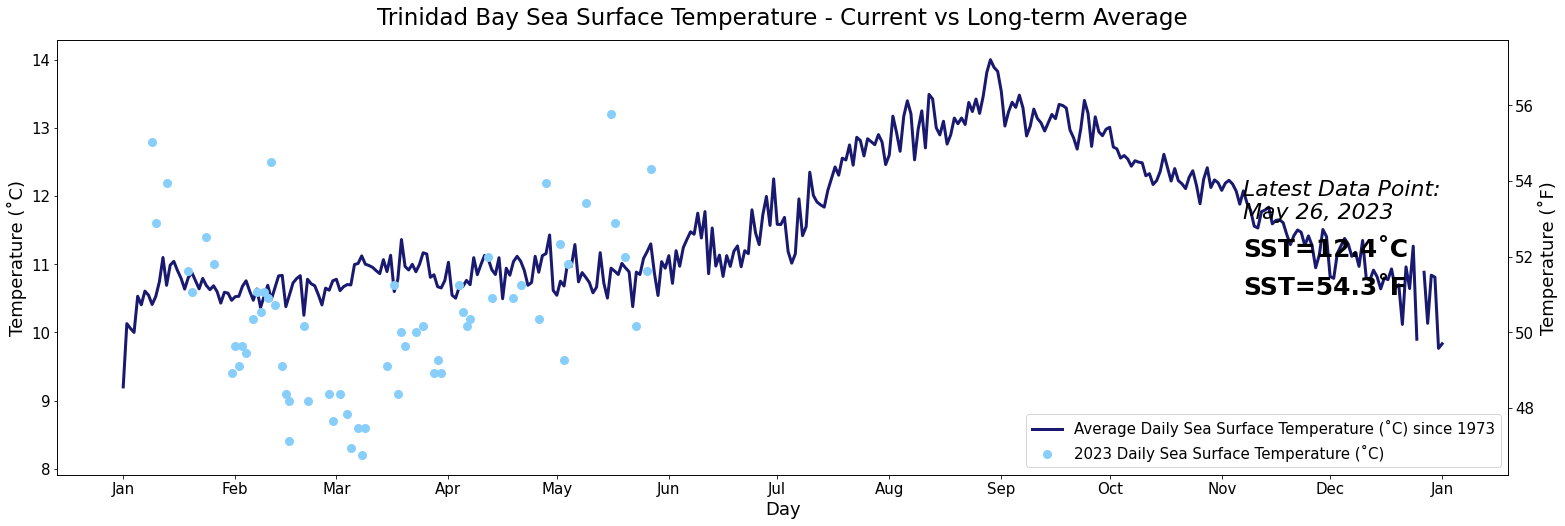

In [23]:
###  TBAY  ###

#setting up working dataframe
TBAY=pd.read_csv('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/non-QC\'d Trinidad Bay Shore Station Data.csv', sep=',')
TBAY['DATETIME']=TBAY['YEAR'].astype(str)+'-'+TBAY['MONTH'].astype(str)+'-'+TBAY['DAY'].astype(str)
TBAY['DATETIME']=pd.to_datetime(TBAY['DATETIME'])
TBAY=TBAY.assign(SURF_TEMP_F = lambda x: (9/5)*x['SURF_TEMP_C']+32).round(1)
TBAY.drop(['TIME_PST','FLAG_DAY_TIME'],axis=1, inplace=True)

#creating dataframe with long-term average temp
TBAY_not_current=TBAY.drop(TBAY.index[18209:])
TBAY_avg=TBAY_not_current.groupby(['MONTH','DAY'],as_index=False).mean()
TBAY_avg['DATETIME']=TBAY_avg['MONTH'].astype(str)+'-'+TBAY_avg['DAY'].astype(str)

#creating dataframe with this year's temp
TBAY_current=TBAY.drop(TBAY.index[:18209])
TBAY_current['DATETIME']=TBAY_current['MONTH'].astype(str)+'-'+TBAY_current['DAY'].astype(str)

#finding current date & temp
date2=TBAY['DATETIME'].iloc[-1]
DATE=date2.strftime('%B %d, %Y')

TBAY_TEMP_C_SURF=TBAY['SURF_TEMP_C'].iloc[-1]
TBAY_TEMP_F_SURF=TBAY['SURF_TEMP_F'].iloc[-1]



#first surface plot with incorrect style
plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(TBAY_avg['DATETIME'], TBAY_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1973', zorder=10)

line2=ax.scatter(TBAY_current['DATETIME'], TBAY_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1973', '2023 Daily Sea Surface Temperature (˚C)'], loc='lower right',fontsize = 15)

# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Trinidad Bay Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(310, 53, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(310, 52, "SST={}˚C".format(TBAY_TEMP_C_SURF), fontsize = 25, fontweight='bold')
plt.text(310, 51, "SST={}˚F".format(TBAY_TEMP_F_SURF), fontsize = 25, fontweight='bold')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)

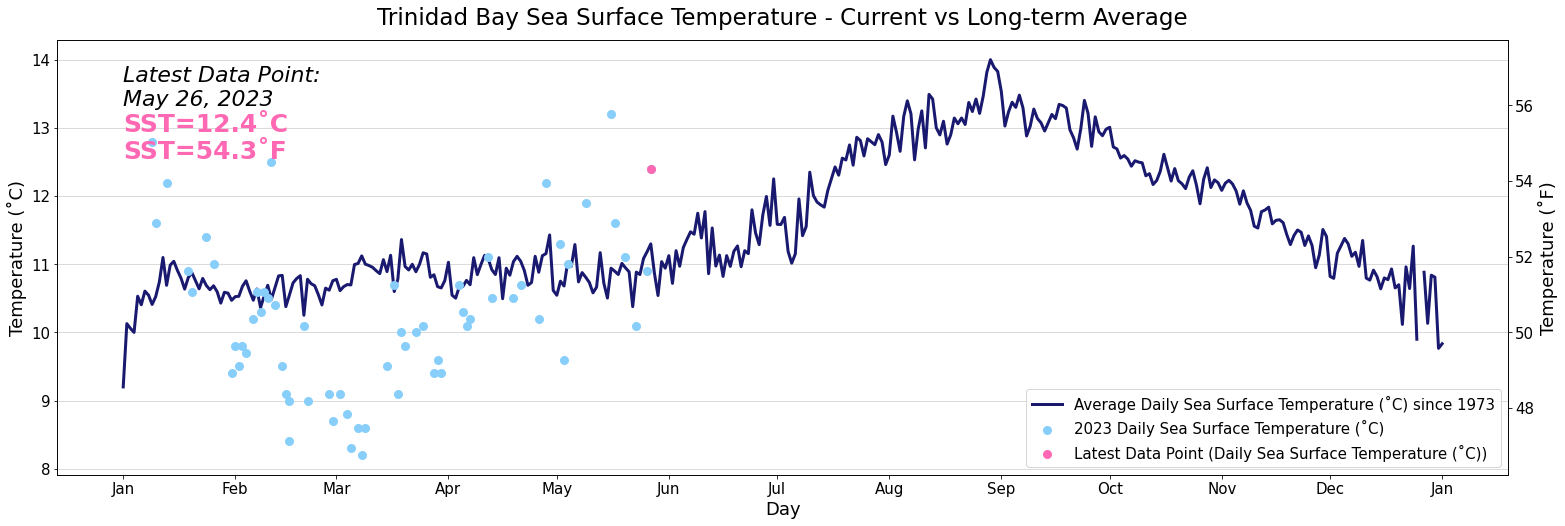

In [24]:
#final TBAY Surface plot

plt.rcParams['figure.figsize'] = (26,8)

fig, ax = plt.subplots()
ax2 = ax.twinx()

line1=ax.plot(TBAY_avg['DATETIME'], TBAY_avg['SURF_TEMP_C'], c='midnightblue', linewidth=3, label='Average Daily Sea Surface Temperature (˚C) since 1973', zorder=10)

line2=ax.scatter(TBAY_current['DATETIME'], TBAY_current['SURF_TEMP_C'], c='lightskyblue', linewidth=3, label='2023 Daily Sea Surface Temperature (˚C)', zorder=10)
ax.set_ylabel('Temperature (˚C)', fontdict={'size':18})
ax2.set_ylabel('Temperature (˚F)', fontdict={'size':18})
#ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1973', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point'], loc='lower right',fontsize = 15)

#shows last data point in pink
last_TEMP_C=TBAY_current['SURF_TEMP_C'].iloc[-1]
last_DATETIME=TBAY_current['DATETIME'].iloc[-1]
line3=ax.scatter(last_DATETIME, last_TEMP_C, c='hotpink', linewidth=3, label='Latest Data Point', zorder=10)
ax.legend(['Average Daily Sea Surface Temperature (˚C) since 1973', '2023 Daily Sea Surface Temperature (˚C)','Latest Data Point (Daily Sea Surface Temperature (˚C))'], loc='lower right',fontsize = 15)


# set twin scale (convert degree celsius to fahrenheit)
T_f = lambda T_c: T_c*1.8 + 32.
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax2.set_ylim((T_f(ymin),T_f(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax2.plot([],[])

# Formating Plot
plt.grid(False) #Gridlines

ax.set_xlabel('Day', fontdict={'size':18})

plt.title('Trinidad Bay Sea Surface Temperature - Current vs Long-term Average', fontdict={'size':23})

plt.text(0, 56, "Latest Data Point:\n{}".format(DATE), fontsize = 22, style='italic')
plt.text(0, 55.3, "SST={}˚C".format(TBAY_TEMP_C_SURF), fontsize = 25, fontweight='bold', c='hotpink')
plt.text(0, 54.6, "SST={}˚F".format(TBAY_TEMP_F_SURF), fontsize = 25, fontweight='bold', c='hotpink')

locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

params = {'legend.fontsize': 'large',
          'figure.figsize': (26,8),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlepad': 15}
plt.rcParams.update(params)
fig.patch.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color ="lightgrey")
#ax2.yaxis.grid(True, color ="lightgrey")

#plt.show()

plt.savefig('/Volumes/sccoos/manual_shore_station/DATA/TEMPERATURE/AutomatedPlotsForMSSwebsite/TBAY_daily.png')